In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '강서구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강서구,염창동,4,1,0,2,0,7,0,0,...,58.0,3724,4452,12868,13463,4443,2780,41730,1,0
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,54.0,1290,1243,11558,6494,2383,2034,25002,2,0
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,50.0,1123,1439,6354,6080,2914,2016,19926,0,0
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,51.0,1550,1749,8301,8575,5518,4511,30204,0,0
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,51.0,2283,2340,20556,14884,7189,5455,52707,0,0
5,강서구,화곡2동,4,0,0,0,2,7,0,0,...,51.0,989,1346,5373,5833,2486,1852,17879,0,0
6,강서구,화곡3동,10,5,0,0,2,19,0,0,...,51.0,1127,1630,6431,6381,3392,2666,21627,0,0
7,강서구,화곡4동,12,3,0,0,2,22,0,0,...,50.0,1000,1294,5963,6560,3257,2513,20587,0,0
8,강서구,화곡본동,8,2,1,1,0,18,0,0,...,54.0,1797,2315,12422,10217,4398,3152,34301,0,0
9,강서구,화곡6동,12,5,0,8,3,28,0,0,...,48.0,1080,1536,9163,7339,3713,2479,25310,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             20 non-null     object 
 1   행정동             20 non-null     object 
 2   갈비/삼겹살          20 non-null     int64  
 3   곱창/양구이전문        20 non-null     int64  
 4   기사식당            20 non-null     int64  
 5   기타고기요리          20 non-null     int64  
 6   냉면집             20 non-null     int64  
 7   닭/오리요리          20 non-null     int64  
 8   돌솥/비빕밥전문점       20 non-null     int64  
 9   두부요리전문          20 non-null     int64  
 10  버섯전문점           20 non-null     int64  
 11  별식/퓨전요리         20 non-null     int64  
 12  보리밥전문           20 non-null     int64  
 13  부대찌개/섞어찌개       20 non-null     int64  
 14  부페              20 non-null     int64  
 15  분식              20 non-null     int64  
 16  설렁탕집            20 non-null     int64  
 17  순두부전문           20 non-null     int64

- 총 72개의 컬럼
- 강서구의 경우 20개의 행정동 -> 각 컬럼마다 **20개**의 데이터가 존재해야 한다.
- 결측치 존재 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,업종,변수,상관계수


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 강서구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,강서구,염창동,4,1,0,2,0,7,0,0,...,226060.3725,70181.61746,58825.70337,7.323312e+05,65257.05819,75161.57959,239304.5454,226740.8358,67723.40030,58143.82675
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,150715.0658,48378.23474,48643.42727,5.242093e+05,31152.47515,33385.47238,224162.8362,141259.5898,45971.73331,48277.14968
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,106561.1905,42504.60291,41084.41783,3.889243e+05,29133.69014,34356.72260,121005.5686,117387.0265,44659.89498,42381.36263
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,294224.5131,106395.11660,126390.23300,9.208991e+05,52374.14658,76049.80170,294241.3451,271992.1443,103535.22390,122706.42590
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,328902.8156,127322.12420,132318.69520,1.199996e+06,74617.34341,63393.53254,447798.2674,348596.8662,132015.72300,133574.66720


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.725533,0.551071,-0.034656,0.521125,0.351792,0.665070,0.507068,0.100817,NaN,0.817070,...,0.763754,0.756585,0.226654,0.754354,-0.207442,0.877830,0.759740,0.620954,0.622716,0.353070
10대 미만 생활인구_평일,0.334803,0.181757,-0.085718,0.020518,-0.057786,0.363971,0.220837,0.380684,NaN,0.533814,...,0.433864,0.445352,0.144352,0.457509,0.060001,0.680250,0.369340,0.176714,0.306265,0.337709
10대 생활인구_평일,0.211241,0.134149,-0.134403,0.111770,0.041566,0.233057,0.067229,0.315799,NaN,0.472266,...,0.472954,0.447073,0.167752,0.497092,-0.187153,0.615595,0.387228,0.072931,0.265526,0.559547
20~30대 생활인구_평일,0.853492,0.675507,-0.020651,0.694113,0.481687,0.746003,0.611948,-0.062692,NaN,0.846045,...,0.769904,0.820915,0.204833,0.820304,-0.226912,0.863641,0.859620,0.786840,0.755794,0.335326
40~50대 생활인구_평일,0.740310,0.586257,-0.038755,0.546062,0.403298,0.676221,0.494060,0.109583,NaN,0.835583,...,0.772682,0.775179,0.205464,0.781942,-0.219514,0.887574,0.783533,0.633581,0.644674,0.353344
60대 생활인구_평일,0.585810,0.422032,0.033117,0.375328,0.233823,0.570062,0.453215,0.126249,NaN,0.667003,...,0.677237,0.573467,0.263630,0.525936,-0.186604,0.721709,0.567143,0.491644,0.417180,0.119746
70대 이상 생활인구_평일,0.304941,0.151868,0.067543,0.119642,0.032764,0.315321,0.292173,0.112348,NaN,0.412404,...,0.489247,0.287602,0.227599,0.215597,-0.130883,0.440183,0.273030,0.256519,0.085210,-0.029061
총생활인구수_주말,0.632784,0.451822,0.034534,0.402990,0.239346,0.610582,0.492266,0.101418,NaN,0.702789,...,0.702903,0.633174,0.232050,0.608629,-0.192512,0.802504,0.632849,0.549506,0.503684,0.228382
10대 미만 생활인구_주말,0.414998,0.286244,-0.044992,0.071582,0.007661,0.453773,0.293674,0.362645,NaN,0.582987,...,0.496205,0.494421,0.190506,0.492008,0.029930,0.731453,0.427469,0.276201,0.351697,0.283618
10대 생활인구_주말,0.292644,0.254492,-0.080674,0.155182,0.059781,0.327850,0.147254,0.279646,NaN,0.500716,...,0.510603,0.467926,0.214019,0.506310,-0.193125,0.664297,0.423229,0.175113,0.313088,0.430048


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_평일,0.853492
1,갈비/삼겹살,20~30대 생활인구_주말,0.758811
2,갈비/삼겹살,40~50대 생활인구_평일,0.740310
3,갈비/삼겹살,총생활인구수_평일,0.725533
4,갈비/삼겹살,총생활인구수_주말,0.632784
...,...,...,...
260,황태전문,10대 생활인구_주말,0.430048
261,황태전문,40~50대 생활인구_평일,0.353344
262,황태전문,총생활인구수_평일,0.353070
263,황태전문,10대 미만 생활인구_평일,0.337709


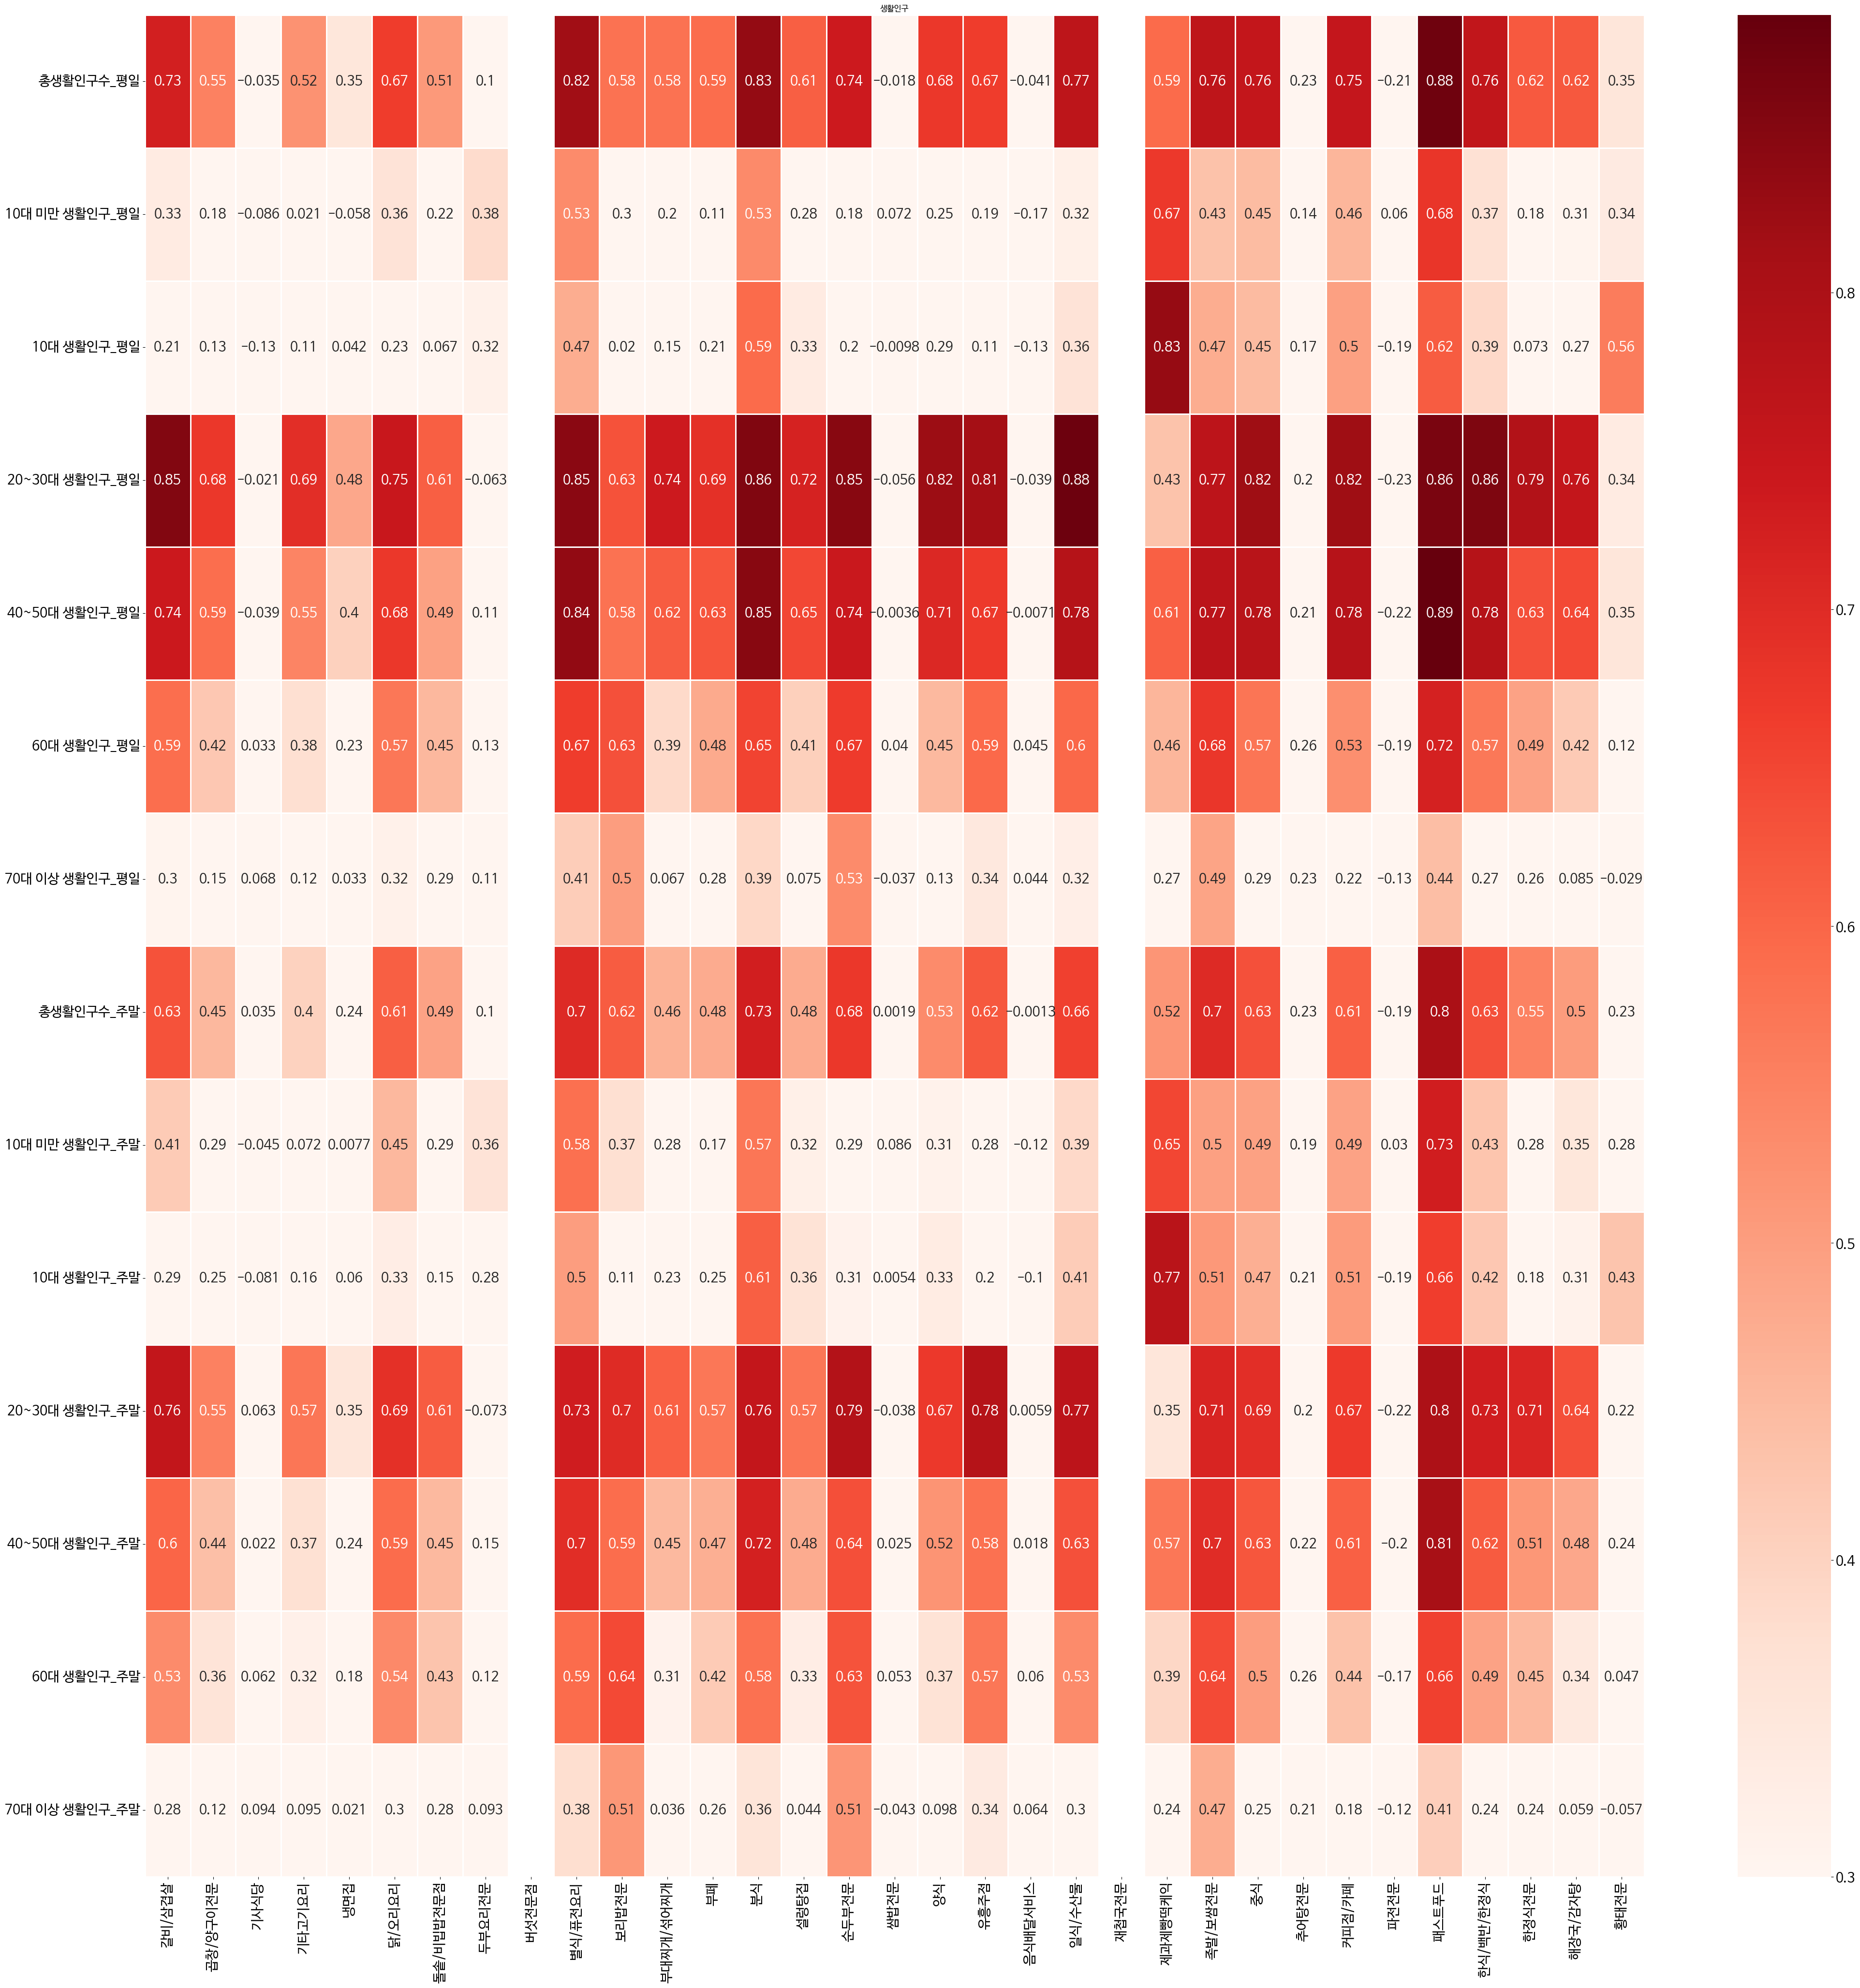

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살       11
곱창/양구이전문      8
기타고기요리        8
냉면집           4
닭/오리요리       12
돌솥/비빕밥전문점     8
두부요리전문        3
별식/퓨전요리      14
보리밥전문        11
부대찌개/섞어찌개     8
부페            8
분식           14
설렁탕집         11
순두부전문        11
양식           10
유흥주점         10
일식/수산물       13
제과제빵떡케익      12
족발/보쌈전문      14
중식           12
커피점/카페       12
패스트푸드        14
한식/백반/한정식    12
한정식전문         8
해장국/감자탕      11
황태전문          6
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,강서구,염창동,4,1,0,2,0,7,0,0,...,56,0,16,41,0,4,0,0,0,0
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,69,0,14,67,1,3,1,0,0,0
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,27,0,6,20,0,1,0,0,0,0
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,59,0,13,88,0,1,0,0,0,0
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,71,0,31,118,2,4,0,0,0,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),-0.085213,0.031302,0.444444,-0.083252,-0.288824,-0.043834,-0.166667,-0.119352,NaN,-0.087637,...,-0.175636,-0.090087,-0.024915,-0.148795,0.19245,0.012939,-0.074579,-0.170996,0.048397,-0.130744
일반대학,-0.085213,0.031302,0.444444,-0.083252,-0.288824,-0.043834,-0.166667,-0.119352,NaN,-0.087637,...,-0.175636,-0.090087,-0.024915,-0.148795,0.19245,0.012939,-0.074579,-0.170996,0.048397,-0.130744
온라인대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기사식당,대학교(전체),0.444444
1,기사식당,일반대학,0.444444


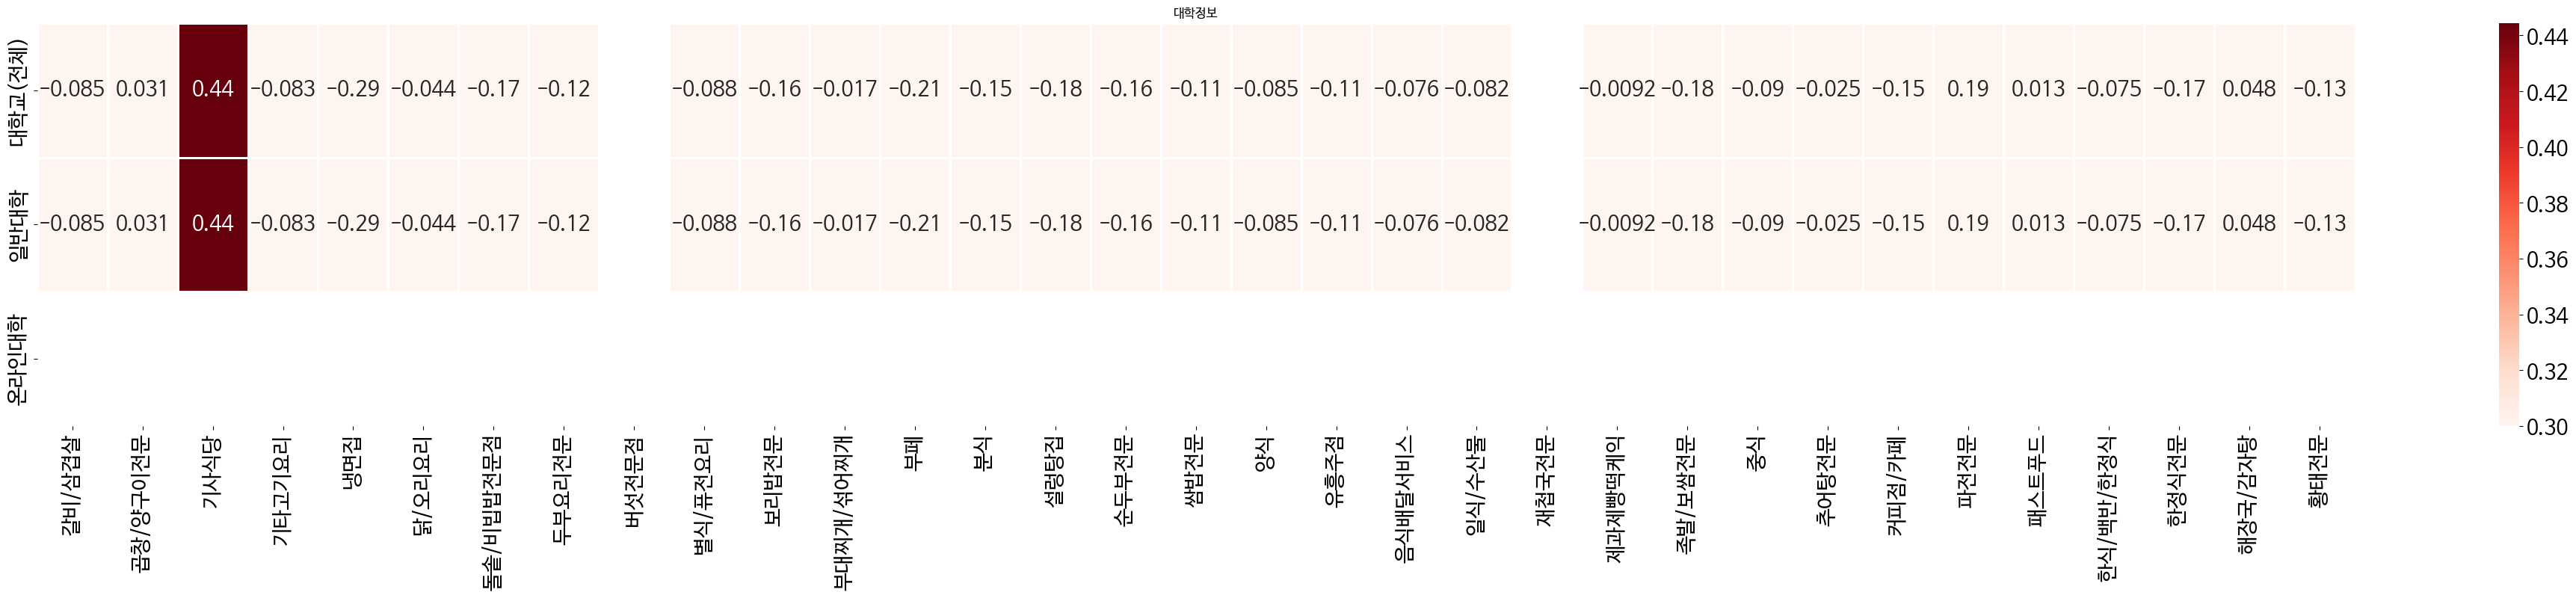

In [16]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

In [17]:
result_univ.groupby('업종')['변수'].count()

업종
기사식당    2
Name: 변수, dtype: int64

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 변수들과의 상관계수가 0.3 이상인 업종은 **기사식당**이다.
- 대학가 주변에는 **기사식당**이 많이 분포하고 있다고 해석할 수 있다.
    - 하지만, 강서구에 존재하는 대학의 수는 **2개**이기 때문에, 대학 수가 업종들의 업소 수와 강한 상관관계가 있다고 단정짓기는 힘들다.

### **c) 초중고학교정보**

In [18]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,강서구,염창동,4,1,0,2,0,7,0,0,...,0,16,41,0,4,0,5,3,2,0
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,0,14,67,1,3,1,1,1,0,0
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,0,6,20,0,1,0,6,2,2,2
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,0,13,88,0,1,0,12,5,3,4
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,0,31,118,2,4,0,3,2,1,0


In [19]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),-0.018438,-0.165055,-0.177541,0.045728,-0.008546,-0.043776,-6.657796e-02,0.419562,NaN,0.306836,...,0.257888,0.233295,3.977834e-17,0.283102,-0.092253,0.262310,0.182452,-0.136615,-0.004833,0.470052
초등학교,-0.067820,-0.131541,-0.070746,0.119268,-0.170276,-0.075756,5.890793e-18,0.379967,NaN,0.180529,...,0.087650,0.071205,-1.586343e-02,0.096782,-0.073521,0.105039,0.061053,-0.195977,-0.038519,0.083247
중학교,0.018973,-0.167265,-0.169638,0.018536,0.035386,-0.102776,-1.484331e-01,0.212590,NaN,0.325315,...,0.184806,0.186548,-1.331329e-01,0.282005,0.048970,0.254337,0.166668,-0.130534,0.058496,0.382590
고등학교,-0.006069,-0.138621,-0.198549,0.004851,0.065657,0.023839,-3.884655e-02,0.454370,NaN,0.287972,...,0.335241,0.296378,9.097719e-02,0.319354,-0.164472,0.290772,0.215827,-0.066426,-0.021621,0.629791


In [20]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,두부요리전문,고등학교,0.454370
1,두부요리전문,초중고(전체),0.419562
2,두부요리전문,초등학교,0.379967
3,별식/퓨전요리,중학교,0.325315
4,별식/퓨전요리,초중고(전체),0.306836
5,분식,고등학교,0.374626
6,분식,초중고(전체),0.339807
7,분식,중학교,0.302152
8,제과제빵떡케익,고등학교,0.629070
9,제과제빵떡케익,초중고(전체),0.550074


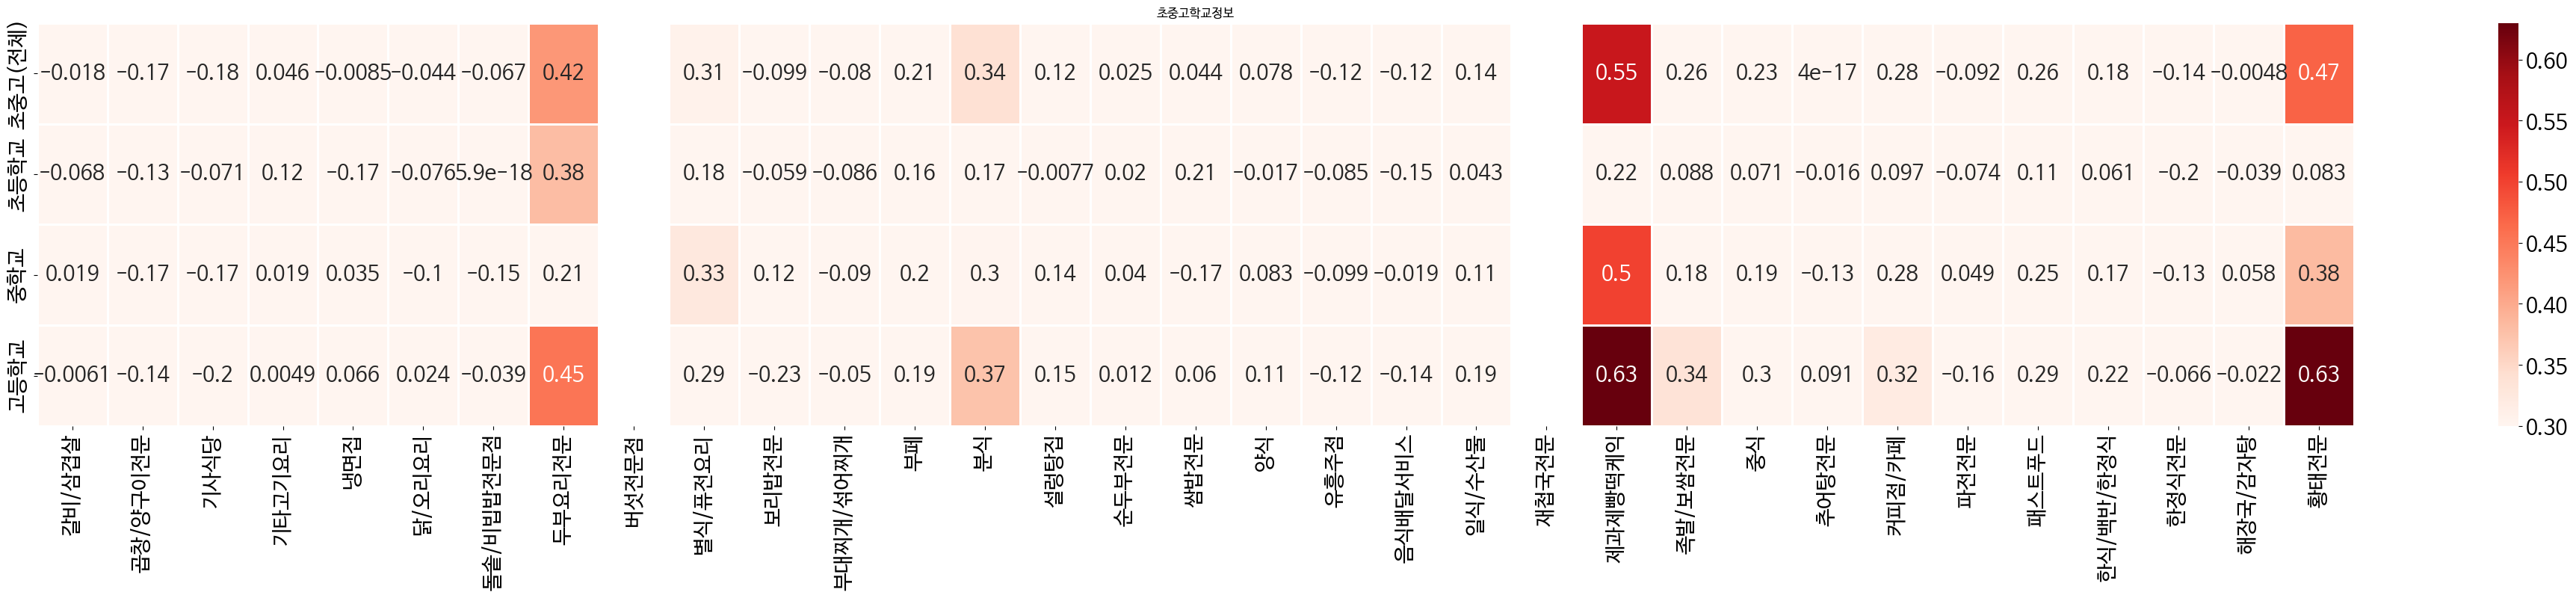

In [21]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

In [22]:
result_school.groupby('업종')['변수'].count()

업종
두부요리전문     3
별식/퓨전요리    2
분식         3
제과제빵떡케익    3
족발/보쌈전문    1
커피점/카페     1
황태전문       3
Name: 변수, dtype: int64

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 상당수의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강서구**에서는 초중고학교정보 데이터는 각 업종의 업소 수와 상당히 뚜렷한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [23]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,강서구,염창동,4,1,0,2,0,7,0,0,...,0,16,41,0,4,0,40237,14738,2.73,5247.045
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,0,14,67,1,3,1,23182,12072,1.92,5654.740
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,0,6,20,0,1,0,20469,8175,2.50,5654.740
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,0,13,88,0,1,0,30611,14231,2.15,5654.740
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,0,31,118,2,4,0,51842,25039,2.07,4585.700


In [24]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.390822,0.246218,-0.006638,0.208354,-0.094517,0.431008,0.478550,0.338046,NaN,0.432243,...,0.464035,0.458910,0.299744,0.409841,-0.189613,0.691957,0.394649,0.338747,0.336799,0.161370
총가구수,0.620092,0.401343,0.035841,0.418301,0.096916,0.600713,0.665017,0.173928,NaN,0.587535,...,0.601475,0.609690,0.281741,0.537770,-0.182157,0.767421,0.582571,0.598483,0.506842,0.159162
가구당인구수,-0.322452,-0.220564,-0.118591,-0.342581,-0.330993,-0.204689,-0.312776,0.367671,NaN,-0.184022,...,-0.103898,-0.158613,0.151106,-0.117399,-0.010708,0.027473,-0.247299,-0.431617,-0.222226,0.088621
평균소득금액,0.098371,0.027801,-0.123545,0.272212,0.133844,-0.032595,0.253168,0.136977,NaN,0.348828,...,0.203677,0.356663,0.152759,0.479619,-0.592255,0.303945,0.340815,0.171491,0.206068,0.636989


In [25]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.620092
1,갈비/삼겹살,총인구수,0.390822
2,갈비/삼겹살,가구당인구수,-0.322452
3,곱창/양구이전문,총가구수,0.401343
4,기타고기요리,총가구수,0.418301
...,...,...,...
64,한정식전문,총인구수,0.338747
65,한정식전문,가구당인구수,-0.431617
66,해장국/감자탕,총가구수,0.506842
67,해장국/감자탕,총인구수,0.336799


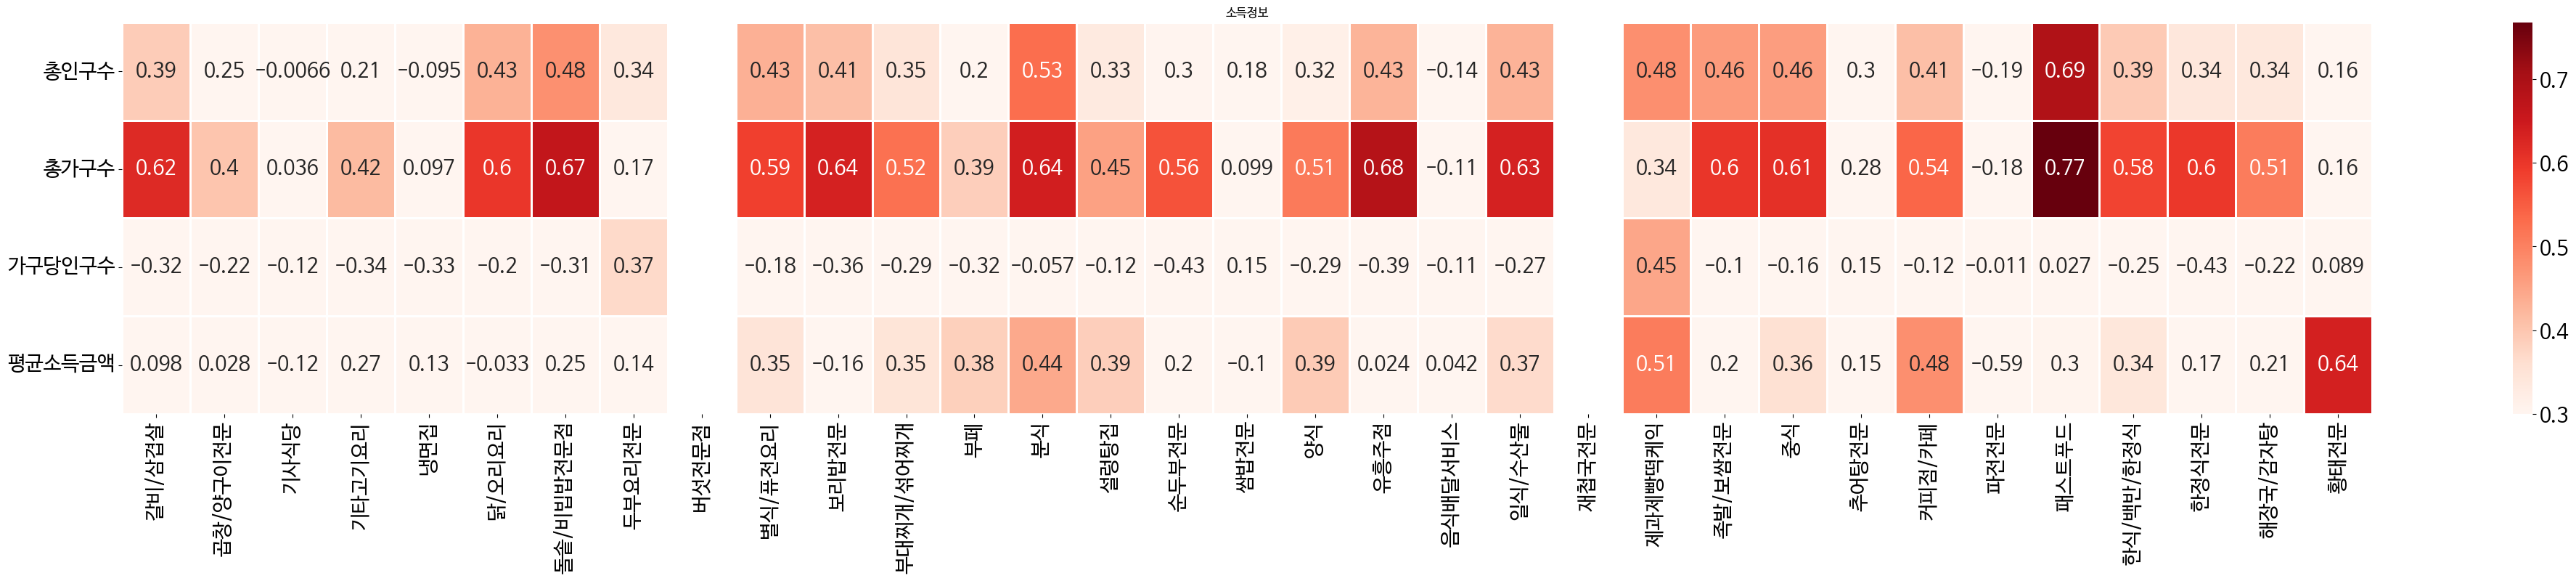

In [26]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [27]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       3
곱창/양구이전문     1
기타고기요리       2
냉면집          1
닭/오리요리       2
돌솥/비빕밥전문점    3
두부요리전문       2
별식/퓨전요리      3
보리밥전문        3
부대찌개/섞어찌개    3
부페           3
분식           3
설렁탕집         3
순두부전문        3
양식           3
유흥주점         3
일식/수산물       3
제과제빵떡케익      4
족발/보쌈전문      2
중식           3
커피점/카페       3
파전전문         1
패스트푸드        3
한식/백반/한정식    3
한정식전문        3
해장국/감자탕      2
황태전문         1
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강서구**에서 소득정보 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [28]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,강서구,염창동,4,1,0,2,0,7,0,0,...,56,0,16,41,0,4,0,LH,116.0,58.0
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,69,0,14,67,1,3,1,LL,106.0,54.0
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,27,0,6,20,0,1,0,HL,122.0,50.0
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,59,0,13,88,0,1,0,LL,106.0,51.0
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,71,0,31,118,2,4,0,LL,114.0,51.0


In [29]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.784770,-0.708437,0.276474,-0.683152,-0.611140,-0.734884,-0.427929,-0.034313,NaN,-0.791256,...,-0.781777,-0.895105,-0.281319,-0.915576,0.234664,-0.814473,-0.886045,-0.669588,-0.756731,-0.685648
폐업점포영업개월,-0.760935,-0.805520,0.229722,-0.715962,-0.574557,-0.749538,-0.351915,0.131256,NaN,-0.424288,...,-0.524332,-0.576942,-0.408798,-0.491215,0.042329,-0.378928,-0.616258,-0.669461,-0.459321,0.040259


In [30]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,폐업점포영업개월,-0.760935
1,갈비/삼겹살,운영점포영업개월,-0.784770
2,곱창/양구이전문,운영점포영업개월,-0.708437
3,곱창/양구이전문,폐업점포영업개월,-0.805520
4,기타고기요리,운영점포영업개월,-0.683152
5,기타고기요리,폐업점포영업개월,-0.715962
6,냉면집,폐업점포영업개월,-0.574557
7,냉면집,운영점포영업개월,-0.611140
8,닭/오리요리,운영점포영업개월,-0.734884
9,닭/오리요리,폐업점포영업개월,-0.749538


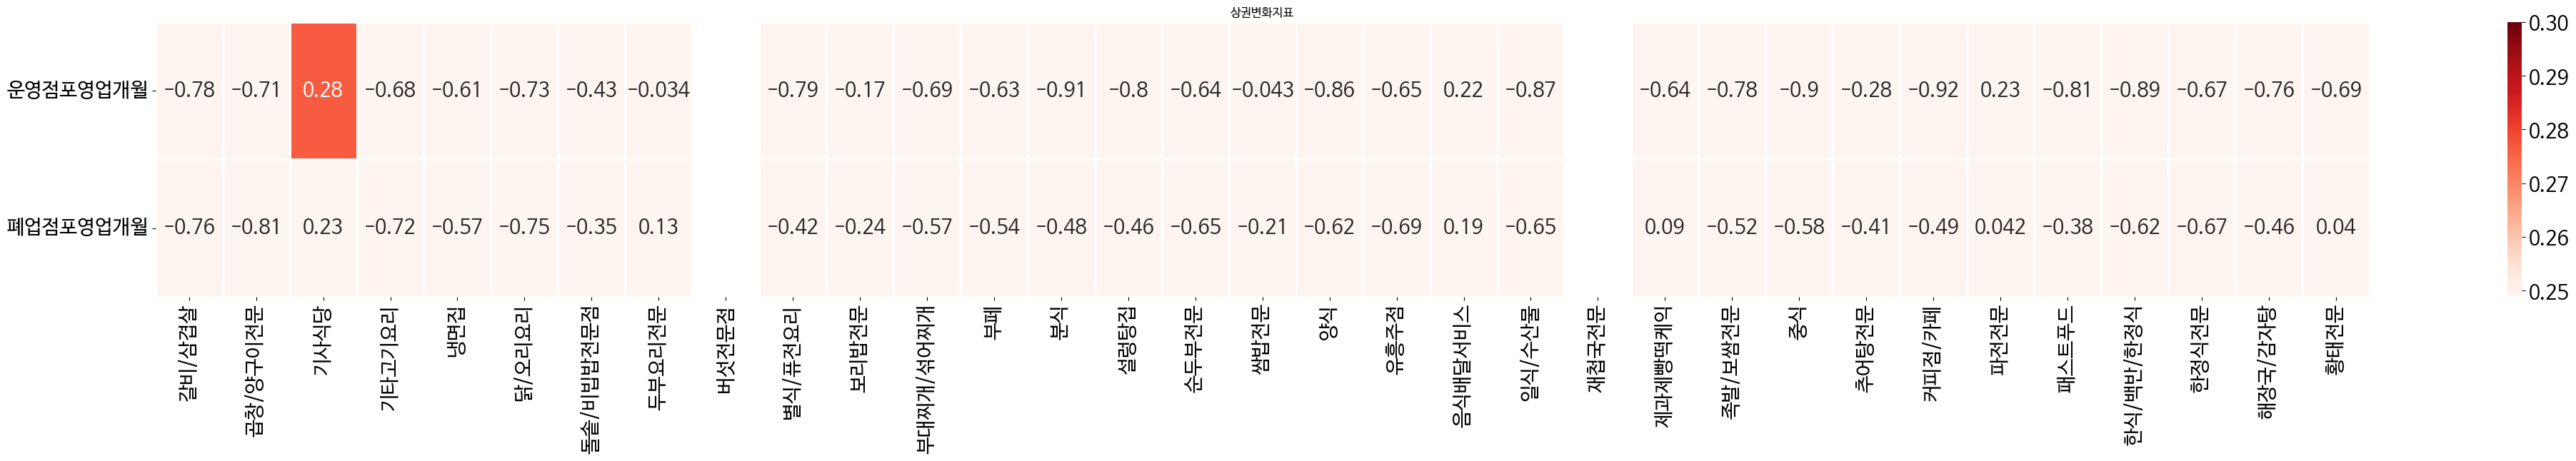

In [31]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [32]:
result_change.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
기타고기요리       2
냉면집          2
닭/오리요리       2
돌솥/비빕밥전문점    2
별식/퓨전요리      2
부대찌개/섞어찌개    2
부페           2
분식           2
설렁탕집         2
순두부전문        2
양식           2
유흥주점         2
일식/수산물       2
제과제빵떡케익      1
족발/보쌈전문      2
중식           2
추어탕전문        1
커피점/카페       2
패스트푸드        2
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      2
황태전문         1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **강서구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 강한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [33]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,강서구,염창동,4,1,0,2,0,7,0,0,...,0,4,0,3724,4452,12868,13463,4443,2780,41730
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,1,3,1,1290,1243,11558,6494,2383,2034,25002
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,0,1,0,1123,1439,6354,6080,2914,2016,19926
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,0,1,0,1550,1749,8301,8575,5518,4511,30204
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,2,4,0,2283,2340,20556,14884,7189,5455,52707


In [34]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,0.134267,0.093001,-0.096182,-0.048491,-0.260090,0.151780,0.206127,0.412793,NaN,0.300190,...,0.134184,0.247787,0.161612,0.279765,-0.040989,0.503024,0.163384,0.006096,0.193764,0.134510
10대,0.047390,0.069804,-0.075834,-0.038558,-0.209395,0.118764,0.092859,0.433130,NaN,0.219719,...,0.185973,0.255149,0.182944,0.282906,-0.157106,0.479976,0.165198,-0.053603,0.163761,0.294851
20 ~ 30대,0.696243,0.462433,0.047872,0.505035,0.166810,0.650181,0.710952,0.015547,NaN,0.601583,...,0.579314,0.639520,0.244232,0.593380,-0.166990,0.765990,0.639563,0.672910,0.639064,0.202978
40 ~ 50대,0.269061,0.167672,-0.019471,0.087154,-0.157633,0.325912,0.332717,0.364134,NaN,0.347218,...,0.357764,0.368080,0.241869,0.340112,-0.136668,0.627001,0.294505,0.181864,0.258956,0.171281
60대,0.235494,0.128135,0.035121,0.086779,-0.140428,0.307695,0.332176,0.376616,NaN,0.293220,...,0.369339,0.251172,0.302078,0.147142,-0.110293,0.454346,0.188151,0.165122,0.069823,-0.140229
70대 이상,-0.006328,-0.084598,0.057346,-0.142444,-0.245212,0.076153,0.207730,0.365501,NaN,0.108383,...,0.199816,0.037984,0.229514,-0.066344,-0.047468,0.238501,-0.029160,-0.013105,-0.169318,-0.172826
총인구,0.415380,0.267388,0.001980,0.218695,-0.078565,0.443383,0.486184,0.304758,NaN,0.460577,...,0.451516,0.471563,0.275443,0.429314,-0.155543,0.706563,0.412923,0.341594,0.377338,0.161289


In [35]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.696243
1,갈비/삼겹살,총인구,0.415380
2,곱창/양구이전문,20 ~ 30대,0.462433
3,기타고기요리,20 ~ 30대,0.505035
4,닭/오리요리,20 ~ 30대,0.650181
...,...,...,...
69,한식/백반/한정식,총인구,0.412923
70,한정식전문,20 ~ 30대,0.672910
71,한정식전문,총인구,0.341594
72,해장국/감자탕,20 ~ 30대,0.639064


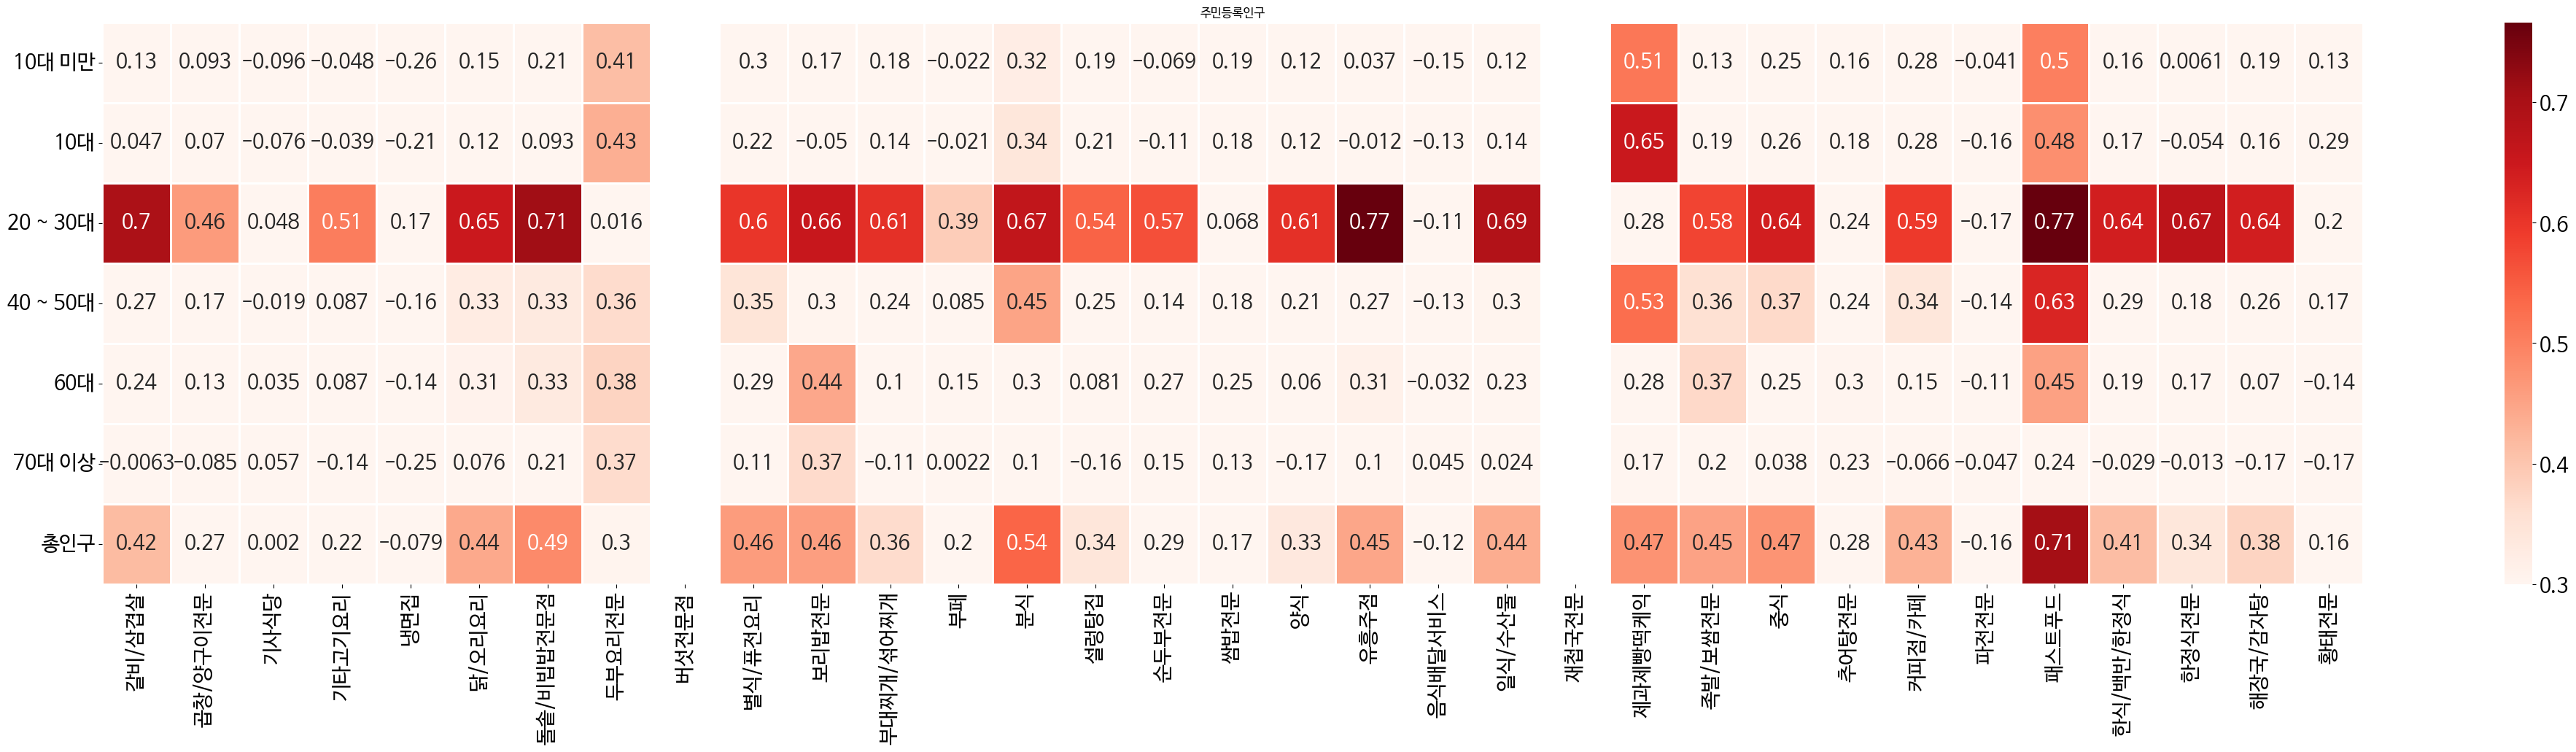

In [36]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [37]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     1
기타고기요리       1
닭/오리요리       4
돌솥/비빕밥전문점    4
두부요리전문       6
별식/퓨전요리      4
보리밥전문        5
부대찌개/섞어찌개    2
부페           1
분식           6
설렁탕집         2
순두부전문        1
양식           2
유흥주점         3
일식/수산물       3
제과제빵떡케익      4
족발/보쌈전문      4
중식           3
추어탕전문        1
커피점/카페       3
패스트푸드        6
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      2
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강서구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [38]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,강서구,염창동,4,1,0,2,0,7,0,0,...,0,56,0,16,41,0,4,0,1,0
1,강서구,등촌1동,6,2,0,0,0,12,1,0,...,1,69,0,14,67,1,3,1,2,0
2,강서구,등촌2동,5,1,0,2,0,7,0,0,...,1,27,0,6,20,0,1,0,0,0
3,강서구,등촌3동,9,3,0,4,2,13,0,0,...,1,59,0,13,88,0,1,0,0,0
4,강서구,화곡1동,22,2,0,3,1,28,1,0,...,1,71,0,31,118,2,4,0,0,0


In [39]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.354186,0.425804,0.380434,0.265787,0.573149,0.277570,0.262191,-0.033134,NaN,0.543353,...,0.329013,0.427748,-0.122193,0.530528,-0.195898,0.397217,0.494113,0.427239,0.489282,0.266173
역(환승역),0.202628,0.294664,0.522976,0.177557,0.604192,0.197109,0.049029,-0.140442,NaN,0.336664,...,0.323969,0.204700,-0.175901,0.277723,-0.226455,0.196024,0.312872,0.301816,0.270505,0.038462


In [40]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,역(전체),0.354186
1,곱창/양구이전문,역(전체),0.425804
2,기사식당,역(환승역),0.522976
3,기사식당,역(전체),0.380434
4,냉면집,역(환승역),0.604192
5,냉면집,역(전체),0.573149
6,별식/퓨전요리,역(전체),0.543353
7,별식/퓨전요리,역(환승역),0.336664
8,보리밥전문,역(전체),0.417078
9,보리밥전문,역(환승역),0.365758


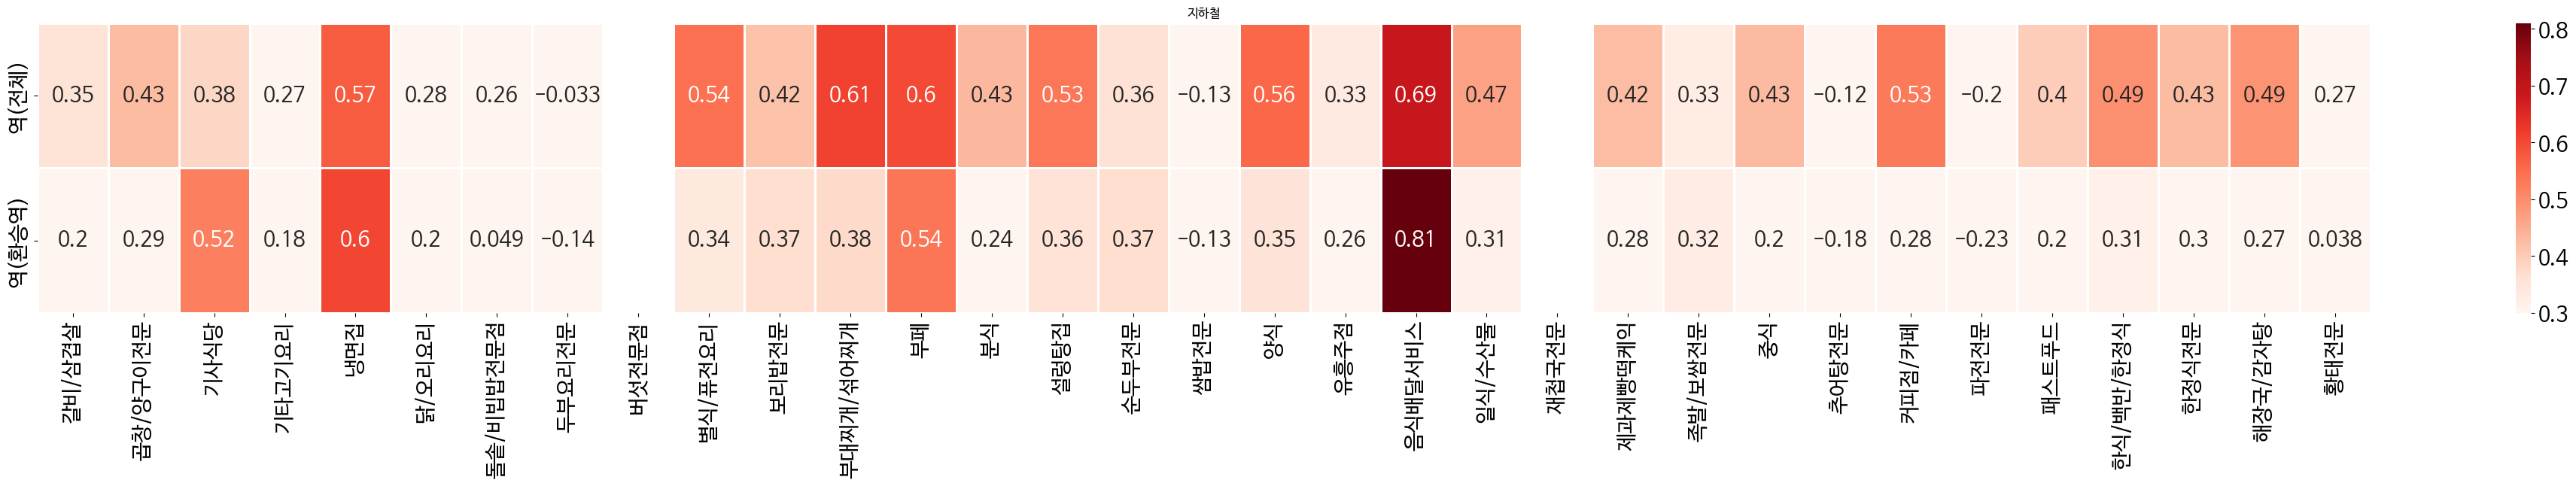

In [41]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [42]:
result_subway.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     1
기사식당         2
냉면집          2
별식/퓨전요리      2
보리밥전문        2
부대찌개/섞어찌개    2
부페           2
분식           1
설렁탕집         2
순두부전문        2
양식           2
유흥주점         1
음식배달서비스      2
일식/수산물       2
제과제빵떡케익      1
족발/보쌈전문      2
중식           1
커피점/카페       1
패스트푸드        1
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      1
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강서구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 작다고 할 수 있다.